<a href="https://colab.research.google.com/github/BankNatchapol/ML-Algorithm/blob/master/Multiclass_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiclass Logistic Regression**
---
ในการทำ Multiclass Logistic Regression จะไม่ต่างกับ 2 class มาก เพียงแค่ในการทำ Multiclass จะต้องทำการเปรียบเทียบด้วยข้อมูลกลุ่มแรกเป็นข้อมูลที่เราต้องการหา อีกกลุ่มคือกลุ่มที่เหลือ หรือเรียกวิธีการนี้ว่า One Vs All (One Vs Rest) ซึ่งจะได้ผลลัพท์ตามภาพ<br>
<center>

![alt text](https://raw.githubusercontent.com/BankNatchapol/ML-Algorithm/master/MulLo.png)
</center>




ขั้นแรก download **Three blobs** dataset ด้วย sklearn 


In [0]:
from sklearn.datasets import make_blobs
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

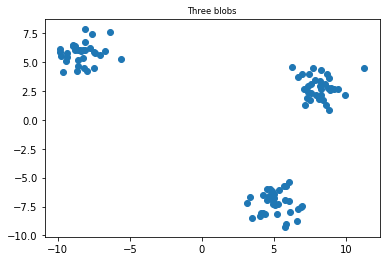

In [1122]:
plt.title("Three blobs", fontsize='small')
X, Y1 = make_blobs(n_features=2, centers=3,random_state=77)
plt.scatter(X[:, 0], X[:, 1], marker='o');

ทำการสร้าง dummy column ที่เป็นเลข 1 ขึ้นมา

In [0]:
c = np.ones([len(X),3]) # add ones column to X
c[:,1:] = X
X = c

สร้าง cost function ในการทำ classification โดย จะมีการเพิ่ม Jacobian Matrix ขึ้นมาเพื่อใช้ในการ Optimize 
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1}&\frac{\partial f_1}{\partial x_2}&\dots&\frac{\partial f_1}{\partial x_n}\\\frac{\partial f_2}{\partial x_1}&\frac{\partial f_2}{\partial x_2}&\dots&\frac{\partial f_2}{\partial x_n}\\
\vdots&\vdots&&\vdots\\\frac{\partial f_m}{\partial x_1}&\frac{\partial f_m}{\partial x_2}&\dots&\frac{\partial f_m}{\partial x_n}\\\end{bmatrix}

In [0]:
def sigmoid(z): #sigmoid function  
    return 1/(1+np.exp(-1*z)) 

def hypo(theta,x): #hypothesis function  
    return sigmoid(np.dot(theta,x.T))

def cost(theta): #cost function  
    m = len(X)
    h = hypo(theta,X)  
    return (1/m)*(-np.dot(Y.T,np.log(h).T)-np.dot((1-Y.T),np.log(1-h).T)) 
    
def Jac(theta): #Gradient Descent  
    m = len(X)   
    upd = (1/m)*np.dot(X.T,(hypo(theta,X).T - Y))  
    return upd

โดยในการ Optimize ในครั้งนี้จะลองใช้ Newton Quasi optimizer โดยใช้จาก library scipy <br>
ซึ่งจะได้ผลลัพท์เป็น parameter ของ 3 กลุ่ม

In [1125]:
Y=np.array(list(map(int,Y1==0))) # use Newton Quasi to optimize
result1 = optimize.minimize(cost,[0,0,0],method="Newton-CG",jac=Jac)
Y=np.array(list(map(int,Y1==1)))
result2 = optimize.minimize(cost,[0,0,0],method="Newton-CG",jac=Jac)
Y=np.array(list(map(int,Y1==2)))
result3 = optimize.minimize(cost,[0,0,0],method="Newton-CG",jac=Jac)
print(f'result1.x = {result1.x}\nresult2.x = {result2.x}\nresult3.x = {result3.x}')

result1.x = [-9.47476922  2.22748444  2.15520976]
result2.x = [-1.19174606 -0.73932437 -4.06781735]
result3.x = [-0.31493606 -2.2144262   0.63421928]


In [0]:
def hypoi(x): #find all hypothesis of all point
  a = sigmoid(np.dot(result1.x,x.T))
  b = sigmoid(np.dot(result2.x,x.T))
  c = sigmoid(np.dot(result3.x,x.T))
  return [a,b,c]

หาว่าแต่ละจุดนั้นมีค่าอยู่ภายในกลุ่มไหน 

In [0]:
colors = list(map(lambda x:np.array(list(map(int,x>0.5))),hypoi(X))) # create array of data group
colors3 =  np.array(colors) # create category
colors3[0] = colors3[0]-1
colors3[1] = 2*colors3[1] 
colors3[2] = 3*colors3[2] 
colors3 = sum(colors3)

นำ parameter ที่ได้มาทำเป็น boundary ของข้อมูล จะได้เส้นที่ใช้แบ่งกลุ่ม

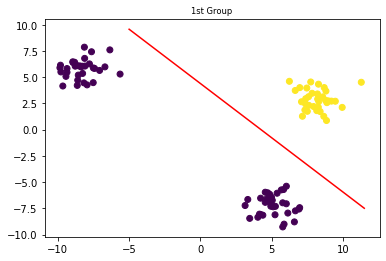

In [1128]:
plt.title("1st Group", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], marker='o',c=colors[0]);
x1=np.arange(-5,12,0.5)
y1=(-(np.arange(-5,12,0.5)*result1.x[1])-result1.x[0])/(result1.x[2])
plt.plot(x1,y1,'r');

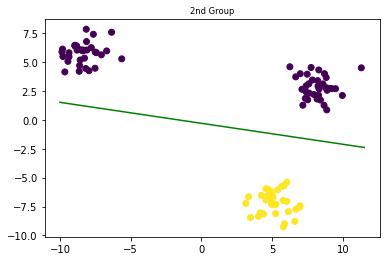

In [1129]:
plt.title("2nd Group", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], marker='o',c=colors[1]);
x2=np.arange(-10,12,0.5)
y2=(-(np.arange(-10,12,0.5)*result2.x[1])-result2.x[0])/(result2.x[2])
plt.plot(x2,y2,'g');


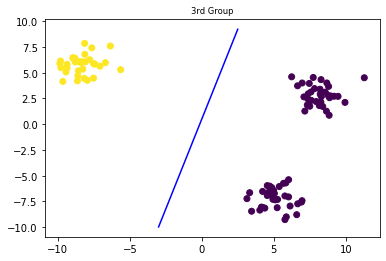

In [1130]:
Y=np.array(list(map(int,Y1==2)))
plt.title("3rd Group", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], marker='o',c=colors[2]);
x3=np.arange(-3,2.8,0.5)
y3=(-(np.arange(-3,2.8,0.5)*result3.x[1])-result3.x[0])/(result3.x[2])
plt.plot(x3,y3,'b');

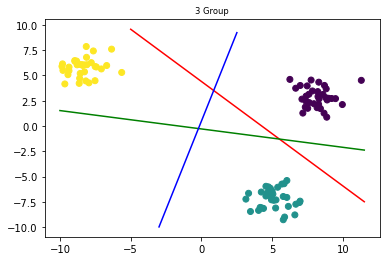

In [1131]:
plt.title("3 Group", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], marker='o',c=colors3);
x1=np.arange(-5,12,0.5)
y1=(-(np.arange(-5,12,0.5)*result1.x[1])-result1.x[0])/(result1.x[2])
plt.plot(x1,y1,'r');
x2=np.arange(-10,12,0.5)
y2=(-(np.arange(-10,12,0.5)*result2.x[1])-result2.x[0])/(result2.x[2])
plt.plot(x2,y2,'g');
x3=np.arange(-3,2.8,0.5)
y3=(-(np.arange(-3,2.8,0.5)*result3.x[1])-result3.x[0])/(result3.x[2])
plt.plot(x3,y3,'b');